Import nltk and download required packages

In [ ]:
# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')  
# nltk.download('wordnet')
# nltk.download('punkt_tab')

In [12]:
# Install TensorFlow
#%pip install --user tensorflow

#import tensorflow as tf
#from tensorflow import keras

#print("TensorFlow Version:", tf.__version__)
#print("Keras Version:", keras.__version__)


Necessary Imports

In [ ]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, ISRIStemmer
import nltk
from nltk.corpus import stopwords
from transformers import pipeline
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [15]:
arabic_stopwords = set(stopwords.words('arabic'))
arabic_stopwords
stemmer = ISRIStemmer()

Read the csv file

In [16]:
df = pd.read_csv('C:\\Users\\Kimo Store\\Downloads\\deep\\output\\elissa_lyrics.csv', encoding='utf-8-sig')
print("Original Lyrics Sample:")
print(df['Lyrics'].head())


Original Lyrics Sample:
0    متخفش مني\nمتخفش مني\nمتخفش مني\nمتخفش مني\nأن...
1    أجمل إحساس\nأجمل إحساس\nأجمل إحساس\nأجمل إحساس...
2    أسعد واحدة\nأسعد واحدة\nأسعد واحدة\nالفرحة الل...
3    أغلى الحبايب\nأغلى الحبايب\nأغلى الحبايب\nأغلى...
4    أنا بستغرب عليه\nأنا بستغرب عليه\nأنا بستغرب ع...
Name: Lyrics, dtype: object


Functions used for preprocessing

In [17]:
def remove_diacritics(text):
    diacritics = r'[\u0617-\u061A\u064B-\u065F]'
    text = re.sub(diacritics, '', text)
    return text

In [18]:
def remove_hamzas(text):
    text = re.sub(r'[أإآٱ]', 'ا', text)  # أ, إ, آ, ٱ → ا
    return text

In [19]:
def replaced_words(text):
    text= re.sub(r'ة', 'ه', text) #ة → ه
    text = re.sub(r'ي\b', 'ى', text) #ي → ى
    return text   

In [20]:
#remove repeated letters
def deduplicate_letters(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [21]:
def remove_punctuation(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [22]:
def normalize_text(text):
    text = remove_diacritics(text)
    text = remove_hamzas(text)
    text = replaced_words(text)
    text = deduplicate_letters(text)
    text = remove_punctuation(text)
    return text

In [23]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in arabic_stopwords]
    return ' '.join(filtered_words)


In [24]:
def tokenize_text(text):
    return [word for word in text.split() if word.strip()]

In [25]:
arabic_stopwords_normalized = {normalize_text(word) for word in arabic_stopwords}

In [26]:
def preprocess_text(text):
    if pd.isna(text):
        return ""
    
    # Remove diacritics
    text = remove_diacritics(text)
    
    # Normalize Arabic letters
    text = remove_hamzas(text)
    text = replaced_words(text)
    
    # Remove repeated letters
    text = deduplicate_letters(text)
    
    # Remove punctuation
    text = remove_punctuation(text)
    
    # Tokenize ensuring strict separation of words
    tokens = re.findall(r'\b\w+\b', text)  # Extract words strictly
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in arabic_stopwords]
    
    # Apply stemming
    tokens = [stemmer.stem(word) for word in tokens]
    
    return '\n'.join(tokens)  # Ensure each word appears on a new line

# Apply preprocessing
df['Processed_Lyrics'] = df['Lyrics'].apply(preprocess_text)

In [27]:
#print number of rows in the dataset
print(df.shape[0])

105


In [28]:
Lyricist = ['نادر عبدالله', 'محمد رفاعى', 'سلامة على', 'احمد الجندى', 'محمد الرفاعى', 'امير طعيمة', 'ايمن قميحة', 'احمد ماضى', 'امير طعيمة', 'كميل خورى', 'اسماعيل الحبروك', 'نادر عبدالله', 'شادى نور', 'عمر سارى', 'عمر سارى', 'هانى عبد الكريم', 'سهام الشعشاع', 'محمد جمعه', 'سلامه على', 'ايمن بهجت قمر', 'سلامه على', 'مروان خورى', 'الياس ناصر', 'نادر عبدالله', 'فيصل همامى', 'احمد مرزوق', 'روميو لحود', 'احمد الجندى', 'سلامه على', 'نادر عبدالله', 'احمد الجندى', 'امير طعيمه', 'نادر عبدالله', 'عادل رفول', 'مروان سعادة', 'نادر عبدالله', 'سامح العجمى', 'الياس ناصر', 'محمد رحيم', 'كمال القبيسى', 'الياس ناصر', 'مروان خورى', 'ملاك عادل', 'محمد رفاعى', 'الياس ناصر', 'نبيل ابو عبدو', 'نبيل ابو عبدو', 'اسامه مصطفى', 'احمد مرزوق', 'فارس اسكندر', 'سليم عساف', 'محمد رفاعى', 'تامر حسين', 'نادر عبدالله', 'امير طعيمه', 'رامى جمال', 'مروان خورى', 'سهام الشعشاع', 'امير طعيمه', 'احمد الجندى', 'نادر عبدالله', 'احمد مرزوق', 'يوسف سليمان', 'مروان خورى', 'نادر عبدالله', 'محمد رحيم', 'نادر عبدالله', 'محمد رفاعى', 'اسامه مصطفى', 'عادل رفول', 'مروان خورى', 'على المولى', 'نزار فرنسىس', 'اكرام العاصى', 'طونى ابى كرم', 'نادر عبدالله', 'مروان خورى', 'بهاء الدىن محمد', 'هانى عبد الكرىم', 'منىر بو عساف', 'منير جورج عساف', 'اسامة مصطفى', 'نادر عبدالله', 'على المولى', 'نادر عبدالله', 'اسامة مصطفى', 'احمد الجندى', 'على المولى', 'بهاء الدىن محمد', 'نادر عبدالله', 'خالد امين', 'امير طعيمة', 'نادر عبدالله', 'اسامه مصطفى', 'امير طعيمة', 'نادر عبدالله', 'الياس ناصر', 'نادر عبدالله', 'نادر عبدالله', 'شادى نور', 'سعىد مرسى', 'الياس ناصر', 'نادر عبدالله', 'صلاح الكردي', 'أحمد ماضي']

Composer = ['ياسر نور', 'محمد رحيم و محمد رفاعى', 'محمد يحيى', 'مدين', 'ايمن محسب', 'وليد سعد', 'اوسين', 'زياد برجى', 'وليد سعد', 'كميل خورى', 'منير مراد', 'تامر على', 'محمد يحيى', 'محمد بشار', 'محمد بشار', 'وليد سعد', 'محمد رحيم', 'محمد رحيم', 'شريف بدر', 'محمد يحيى', 'محمد يحيى', 'مروان شهود', 'غوليس', 'محمد يحيى', 'تامر على', 'محمد يحيى', 'روميو لحود', 'مدين', 'محمد يحيى', 'سونر جيركيكير', 'مدين', 'زياد برجى', 'تامر عاشور', 'ناصر الاسعد', 'برنار لياميس و جيف بارنيل', 'وليد سعد', 'شريف تاج', 'جورج كرم', 'محمد رحيم', 'اسامه الرحبانى', 'سردار اورتاج', 'مروان خورى', 'محمد يحيى', 'محمد رفاعى', 'الكس فوكس', 'جيرار فيرير', 'تركان', 'سامر ابو طالب', 'محمد رحيم', 'سليم سلامه', 'سليم عساف', 'حسام حبيب و جان مارى رياشى', 'عمرو مصطفى', 'محمد رحيم', 'وليد سعد', 'رامى جمال', 'مروان خورى', 'محمد رحيم', 'محمد يحيى', 'مدين', 'وليد سعد', 'محمد رحيم', 'صلاح الكردى', 'مروان خورى', 'تامر عاشور', 'محمد رحيم', 'محمد يحيى', 'حسام حبيب', 'سامر ابو طالب', 'جان صليبا', 'مروان خورى', 'فضل سليمان', 'ناصر الاسعد', 'محمد رحيم','ناصر الاسعد', 'رامى جمال', 'مروان خورى', 'مدين', 'مدين', 'نهاد نجار', 'نهاد نجار', 'محمد يحيى', 'تامر على', 'صلاح الكردى', 'تامر عاشور', 'سامر ابو طالب', 'مدين', 'رامى الشافعى', 'مدين', 'وليد سعد', 'محمد رحيم', 'رامى جمال', 'محمد يحيى', 'سامر ابو طالب', 'رامى جمال', 'جان صليبا', 'فياز كوروز', 'ابراهيم تاتليسس', 'محمد يحيى', 'محمد يحيى', 'بليغ حمدى', 'فياز كوروز', 'نزيه اسلر', 'صلاح الكردي ','زياد برجي']

Year = ['2006', '2002', '2012', '2016', '2008', '2020', '2014', '2022', '2018', '2017', '2014', '2007', '2018', '2020', '2018', '2018', '2012', '2010', '2016', '2023', '2014', '2008', '1999', '2014', '2006', '2014', '2018', '2018', '2012', '2014', '2014', '2020', '2006', '1999', '2015', '2007', '2004', '2000', '2017', '2022', '2000', '2010', '2016', '2005', '2000', '2005', '2002', '2020', '2022', '2009', '2018', '2002', '2018', '2020', '2016', '2020', '2023', '2019', '2014', '2016', '2010', '2012', '2016', '2009', '2006', '2012', '2014', '2004', '2016', '2012', '2006', '2018', '2002', '2007', '2002', '2018', '2014', '2014', '2012', '2006', '2004', '2020', '2009', '2023', '2012', '2016', '2016', '2018', '2016', '2009', '2012', '2018', '2016', '2016', '2022', '2018', '2000', '2018', '2016', '2020', '2018', '2000', '2016', '2016', '2014']

print(f"Length of Lyricist: {len(Lyricist)}")
print(f"Length of Composer: {len(Composer)}")
print(f"Length of Year: {len(Year)}")

df['Lyricist'] = Lyricist
df['composer'] = Composer
df['year']= Year


Length of Lyricist: 105
Length of Composer: 105
Length of Year: 105


In [29]:
# Load model and tokenizer
model_name = "CAMeL-Lab/bert-base-arabic-camelbert-mix-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)


In [30]:
# Sentiment labels mapping (based on CAMeL BERT sentiment analysis)
id2label = {0: "negative", 1: "neutral", 2: "positive"}

In [31]:
def bert_sentiment_analysis(lyrics):
    if not isinstance(lyrics, str) or lyrics.strip() == '':
        return 'neutral'
    
    # Truncate to 512 tokens (BERT's max length)
    lyrics = ' '.join(lyrics.split()[:512])

    # Tokenize the input text
    inputs = tokenizer(lyrics, return_tensors="pt", truncation=True, padding=True, max_length=512)

    # Perform inference
    with torch.no_grad():
        outputs = model(**inputs)

    # Get predicted sentiment
    predicted_class = torch.argmax(outputs.logits).item()
    return id2label[predicted_class]

In [32]:
# Apply to DataFrame
df['Sentiment_BERT'] = df['Lyrics'].apply(bert_sentiment_analysis)

In [33]:
print("BERT-Based Sentiment Analysis Results:")
print(df[['Song Title', 'Sentiment_BERT']].head())

BERT-Based Sentiment Analysis Results:
         Song Title Sentiment_BERT
0         متخفش مني       positive
1        أجمل إحساس       negative
2        أسعد واحدة       negative
3     أغلى الحبايب        negative
4  أنا بستغرب عليه         neutral


In [34]:
output_file = 'C:\\Users\\Kimo Store\\Downloads\\deep\\output\\elissa_lyrics_preprocessed.csv'

Save the preprocessed lyrics to another csv file

In [35]:
df.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"Preprocessed lyrics saved to {output_file}")
print(df.head())

Preprocessed lyrics saved to C:\Users\Kimo Store\Downloads\deep\output\elissa_lyrics_preprocessed.csv
         Song Title                                             Lyrics  \
0         متخفش مني  متخفش مني\nمتخفش مني\nمتخفش مني\nمتخفش مني\nأن...   
1        أجمل إحساس  أجمل إحساس\nأجمل إحساس\nأجمل إحساس\nأجمل إحساس...   
2        أسعد واحدة  أسعد واحدة\nأسعد واحدة\nأسعد واحدة\nالفرحة الل...   
3     أغلى الحبايب   أغلى الحبايب\nأغلى الحبايب\nأغلى الحبايب\nأغلى...   
4  أنا بستغرب عليه   أنا بستغرب عليه\nأنا بستغرب عليه\nأنا بستغرب ع...   

                                                 URL  \
0  https://lyricstranslate.com/en/elissa-metkahaf...   
1  https://lyricstranslate.com/en/elissa-agmal-eh...   
2  https://lyricstranslate.com/en/elissa-assad-wa...   
3  https://lyricstranslate.com/en/elissa-aghla-el...   
4  https://lyricstranslate.com/en/elissa-ana-bast...   

                                    Processed_Lyrics      Lyricist  \
0  تخفش\nمنى\nتخفش\nمنى\nتخفش\nمنى\nتخفش\nمنى\

In [36]:
df['Processed_Lyrics'] = df['Processed_Lyrics'].astype(str)

In [48]:
# Install deep_translator if not already installed
%pip install deep-translator

from transformers import pipeline
from deep_translator import GoogleTranslator

# Load emotion analysis pipeline (English)
emotion_classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", top_k=None)

# Initialize translator
translator = GoogleTranslator(source='ar', target='en')

def analyze_emotions_translated(lyrics):
    if not isinstance(lyrics, str) or lyrics.strip() == '':
        return 'neutral'
    # Translate Arabic to English
    try:
        translated_lyrics = translator.translate(lyrics)
        # Truncate to 512 tokens
        translated_lyrics = ' '.join(translated_lyrics.split()[:512])
        # Get emotion scores
        emotions = emotion_classifier(translated_lyrics)[0]
        dominant_emotion = max(emotions, key=lambda x: x['score'])['label']
        return dominant_emotion
    except Exception as e:
        print(f"Translation error: {e}")
        return 'neutral'

# Apply emotion analysis to translated lyrics
df['Emotion'] = df['Lyrics'].apply(analyze_emotions_translated)

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Token indices sequence length is longer than the specified maximum sequence length for this model (984 > 512). Running this sequence through the model will result in indexing errors


Translation error: The expanded size of the tensor (984) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 984].  Tensor sizes: [1, 514]


In [49]:
print("Emotion Analysis Results:")
print(df[['Song Title', 'Emotion']].head())

Emotion Analysis Results:
         Song Title   Emotion
0         متخفش مني      fear
1        أجمل إحساس   neutral
2        أسعد واحدة   sadness
3     أغلى الحبايب    sadness
4  أنا بستغرب عليه   surprise


C:\Users\Kimo Store\AppData\Local\Temp\ipykernel_26924\568316803.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Emotion', palette='muted')


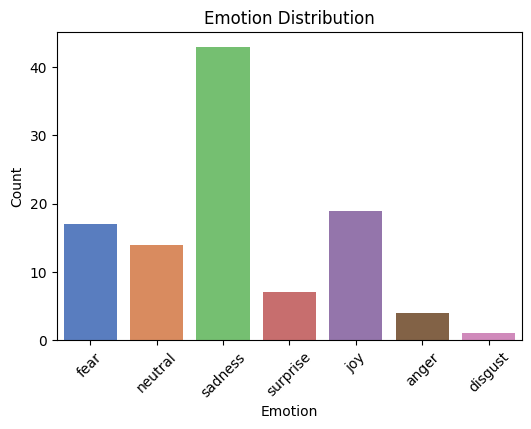

In [50]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Emotion', palette='muted')
plt.title("Emotion Distribution")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=20)  # Limit to top 20 features for simplicity

# Compute TF-IDF on processed lyrics
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Processed_Lyrics'])

# Get feature names (words)
tfidf_features = tfidf_vectorizer.get_feature_names_out()

# Convert to DataFrame for easier analysis
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_features)

# Add TF-IDF results to the main DataFrame (e.g., top word per song)
df['Top_TFIDF_Word'] = tfidf_df.idxmax(axis=1)

In [52]:
print("Top TF-IDF Words per Song (Sample):")
print(df[['Song Title', 'Top_TFIDF_Word']].head())

Top TF-IDF Words per Song (Sample):
         Song Title Top_TFIDF_Word
0         متخفش مني          حبيبى
1        أجمل إحساس            انا
2        أسعد واحدة            انا
3     أغلى الحبايب              فى
4  أنا بستغرب عليه             انا


C:\Users\Kimo Store\AppData\Local\Temp\ipykernel_26924\2443868278.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tfidf_sums.values, y=tfidf_sums.index, palette='coolwarm')


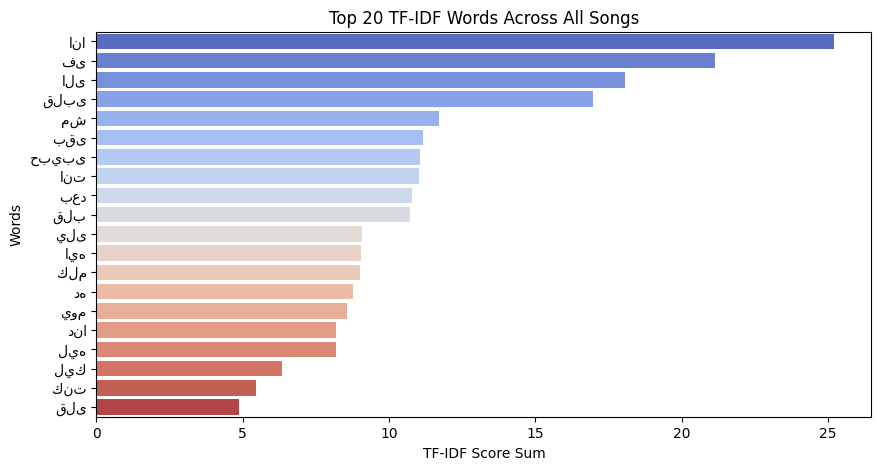

In [53]:
tfidf_sums = tfidf_df.sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=tfidf_sums.values, y=tfidf_sums.index, palette='coolwarm')
plt.title("Top 20 TF-IDF Words Across All Songs")
plt.xlabel("TF-IDF Score Sum")
plt.ylabel("Words")
plt.show()

In [54]:
# Save updated DataFrame with emotion and TF-IDF results
output_file_updated = 'C:\\Users\\Kimo Store\\Downloads\\deep\\output\\elissa_lyrics_preprocessed_with_emotion_tfidf.csv'
df.to_csv(output_file_updated, index=False, encoding='utf-8-sig')
print(f"Updated DataFrame with emotion and TF-IDF saved to {output_file_updated}")

Updated DataFrame with emotion and TF-IDF saved to C:\Users\Kimo Store\Downloads\deep\output\elissa_lyrics_preprocessed_with_emotion_tfidf.csv
